In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

import ipywidgets

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv("house_prices.csv")

df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
X = df.drop(columns="SalePrice")   
y = df["SalePrice"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
index_drop = X_train.query("GrLivArea > 4500").index
index_drop

Index([523, 1298], dtype='int64')

In [9]:
X_train = X_train.drop(index=index_drop)
y_train = y_train.drop(index=index_drop)

In [10]:
X_train_num = X_train.select_dtypes(include=np.number).drop(columns="Id")

X_train_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
254,20,70.0,8400,5,6,1957,1957,0.0,922,0,...,294,250,0,0,0,0,0,0,6,2010
1066,60,59.0,7837,6,7,1993,1994,0.0,0,0,...,380,0,40,0,0,0,0,0,5,2009
638,30,67.0,8777,5,7,1910,1950,0.0,0,0,...,0,328,0,164,0,0,0,0,5,2008
799,50,60.0,7200,5,7,1937,1950,252.0,569,0,...,240,0,0,264,0,0,0,0,6,2007
380,50,50.0,5000,5,6,1924,1950,0.0,218,0,...,308,0,0,242,0,0,0,0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,78.0,9317,6,5,2006,2006,0.0,24,0,...,440,0,22,0,0,0,0,0,3,2007
1130,50,65.0,7804,4,3,1928,1950,0.0,622,0,...,576,431,44,0,0,0,0,0,12,2009
1294,20,60.0,8172,5,7,1955,1990,0.0,167,0,...,572,0,0,0,0,0,0,0,4,2006
860,50,55.0,7642,7,8,1918,1998,0.0,0,0,...,216,0,240,0,0,0,0,0,6,2007


In [11]:
X_train_num_full = X_train_num.dropna(axis=1)

In [12]:
modelo_full = LinearRegression().fit(X_train_num_full, y_train)

In [13]:
modelo_full.intercept_

-716527.4382439918

In [14]:
modelo_full.coef_

array([-1.26375182e+02,  5.32994082e-01,  1.52872496e+04,  4.57913246e+03,
        4.05105414e+02,  1.82715322e+02,  2.51221840e+01, -4.47075182e+00,
        1.36568464e+00,  2.20171168e+01,  2.27592477e+01,  2.93947729e+01,
       -1.22078395e+01,  3.99461812e+01,  1.63581381e+03, -5.77973247e+03,
       -3.10496297e+03, -3.74510912e+03, -1.25577334e+04, -1.26441896e+04,
        4.29293599e+03,  1.42303597e+03,  1.63552631e+03,  2.14474628e+01,
        1.02525626e+01,  1.33477038e+01,  1.39595880e+00,  2.09349758e+01,
        3.79580386e+01,  6.26625954e+01, -1.73306325e+00, -3.41476788e+02,
       -2.48959241e+02])

In [15]:
modelo_full.feature_names_in_

array(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'], dtype=object)

In [16]:
pd.DataFrame(modelo_full.coef_, modelo_full.feature_names_in_, columns=["Parametro"])

,Parametro
MSSubClass,-126.375182
LotArea,0.532994
OverallQual,15287.249591
OverallCond,4579.132457
YearBuilt,405.105414
YearRemodAdd,182.715322
BsmtFinSF1,25.122184
BsmtFinSF2,-4.470752
BsmtUnfSF,1.365685
TotalBsmtSF,22.017117


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [18]:
def calc_metricas_regressao(y_test, y_pred):

    plt.figure(figsize=(12, 5))

    plt.subplot(121)
    plt.scatter(x=y_test, y=y_pred, color="r", label="residuos")

    x = np.linspace(0, 800000, 2)
    y = x
    plt.plot(x, y, color="k", ls=":", label="modelo perfeito")

    plt.legend()

    plt.subplot(122)
    plt.title("Distribuição de residuos")
    sns.histplot(x=(y_test - y_pred), kde=True)

    plt.show()

    # ---------------

    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)

    print(f"MAE = {MAE:.2f}\nRMSE = {RMSE:.2f}\nMAPE = {MAPE:.2%}")

In [19]:
X_test_num_full = X_test[X_train_num_full.columns]

y_pred = modelo_full.predict(X_test_num_full)

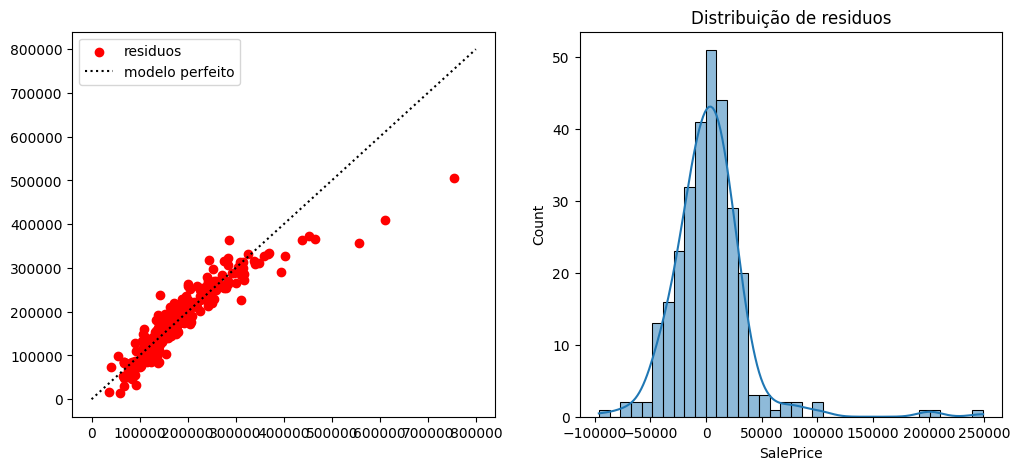

MAE = 22079.30
RMSE = 34605.80
MAPE = 13.35%


In [20]:
calc_metricas_regressao(y_test, y_pred)

In [24]:
# Overrfitting

def calc_metricas_regressao(y_true, y_pred, tipo):

    plt.figure(figsize=(12, 5))

    plt.subplot(121)
    plt.scatter(x=y_true, y=y_pred, color="r", label="residuos")

    x = np.linspace(0, 800000, 2)
    y = x
    plt.plot(x, y, color="k", ls=":", label="modelo perfeito")

    plt.legend()

    plt.subplot(122)
    plt.title("Distribuição de residuos")
    sns.histplot(x=(y_true - y_pred), kde=True)

    plt.show()

    # ---------------

    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = np.sqrt(MSE)
    MAPE = mean_absolute_percentage_error(y_true, y_pred)

    r2 = r2_score(y_true, y_pred)

    print(f"Metricas de {tipo}\n\nMAE = {MAE:.2f}\nRMSE = {RMSE:.2f}\nMAPE = {MAPE:.2%}\nR^2 = {r2:.2f}")

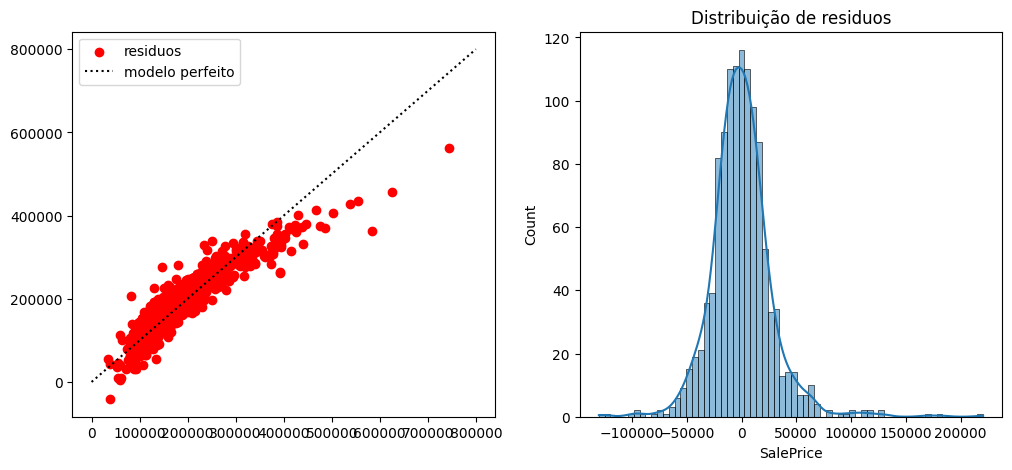

Metricas de treino

MAE = 19590.38
RMSE = 28201.69
MAPE = 12.00%
R^2 = 0.87


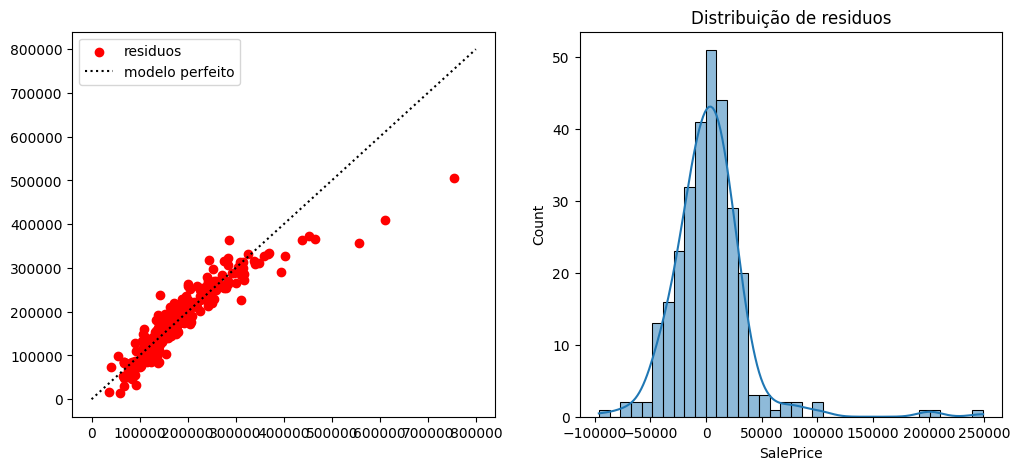

Metricas de teste

MAE = 22079.30
RMSE = 34605.80
MAPE = 13.35%
R^2 = 0.84


In [25]:
modelo_full = LinearRegression().fit(X_train_num_full, y_train)

X_test_num_full = X_test[X_train_num_full.columns]

y_pred_train = modelo_full.predict(X_train_num_full)
calc_metricas_regressao(y_train, y_pred_train, tipo="treino")

y_pred_test = modelo_full.predict(X_test_num_full)
calc_metricas_regressao(y_test, y_pred_test, tipo="teste")
